# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

# Question 1

In [34]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

#import packages

import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
model = inauguralproject.inauguralproject()

After having installed all the necessary packages and having set the class inagural project. We create two lists for the values of alpha and sigma. We slove the model by looping trough all the values of both variables sigma and alpha. Finally we store the results in a matrix for a better presentation. In addition show the results in a plot in order to have a visual presentation too. 

alpha = 0.25 and sigma = 0.5, HF/HM = 3.0000 / 5.5000 = 0.5455
alpha = 0.25 and sigma = 1, HF/HM = 2.0000 / 6.5000 = 0.3077
alpha = 0.25 and sigma = 1.5, HF/HM = 1.5000 / 7.0000 = 0.2143
alpha = 0.5 and sigma = 0.5, HF/HM = 4.5000 / 4.5000 = 1.0000
alpha = 0.5 and sigma = 1, HF/HM = 4.5000 / 4.5000 = 1.0000
alpha = 0.5 and sigma = 1.5, HF/HM = 4.5000 / 4.5000 = 1.0000
alpha = 0.75 and sigma = 0.5, HF/HM = 5.5000 / 3.0000 = 1.8333
alpha = 0.75 and sigma = 1, HF/HM = 6.5000 / 2.0000 = 3.2500
alpha = 0.75 and sigma = 1.5, HF/HM = 7.0000 / 1.5000 = 4.6667
[[1.83333333 3.25       4.66666667]
 [1.         1.         1.        ]
 [0.54545455 0.30769231 0.21428571]]


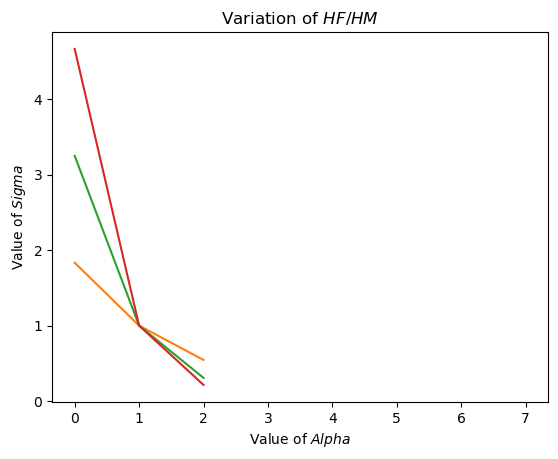

In [36]:
#create list with new values of alpha and solve
al = [0.25, .5, .75]

#create list with new values of sigma and solve
sl = [0.5, 1, 1.5]

#create an empty matrix to store the results
optm = np.zeros([3,3])

#create a loop to go trough all the values of alpha and sigma, solve the model
for it, a in enumerate(al):
    model.par.alpha = a

    for jt, s in enumerate(sl):

        model.par.sigma = s
        opt = model.solve_discrete()

        #print the values of alpha, sigma and the ratio of HM/HF (to check if it seems correct)
        
        print(f"alpha = {a} and sigma = {s}, HF/HM = {opt.HF:.4f} / {opt.HM:.4f} = {opt.HF/opt.HM:.4f}")
        
        #fill in the values of HM/HF into the matrix optm 
        optm[it, jt] = opt.HM/opt.HF

#print the matrix
print(optm)


#plot the results 

#create empty dictionary 
res_HF = {}
res_HM = {}
res_HFHM = {}

# and store the results
res_HF = opt.HF
res_HM = opt.HM
res_HFHM = optm

# create the figure for visual presentation of the results 
fig = plt.figure()

# plot the results 
ax = fig.add_subplot(1,1,1)

ax.plot(res_HF, res_HM, res_HFHM)

# label the axes and title 
ax.set_title('Variation of $HF/HM$')
ax.set_xlabel('Value of $Alpha$')
ax.set_ylabel('Value of $Sigma$');              

In [37]:
print(optm)

[[1.83333333 3.25       4.66666667]
 [1.         1.         1.        ]
 [0.54545455 0.30769231 0.21428571]]


Sigma is the elasticity of substiution and alpha/ (1-alpha) represents the productivity in home production for female relative to males. Therefore the productivity is equal when alpha = 0.5. In the matrix we can see how the Hours worked at Home by men and women change with alpha and sigma. 

# Question 2

Explain your code and procedure

First we reset the values of alpha and sigma to the values of the basic model, meaning alpha = 0.5 and simga = 1. We are interested by the variation of the female wage and therefore create an array with the values for wF. As in Q1 we also solve the model by looping trough all the values (here of wF). WE then stroe the results in the empty lists that we created and plot the results. 

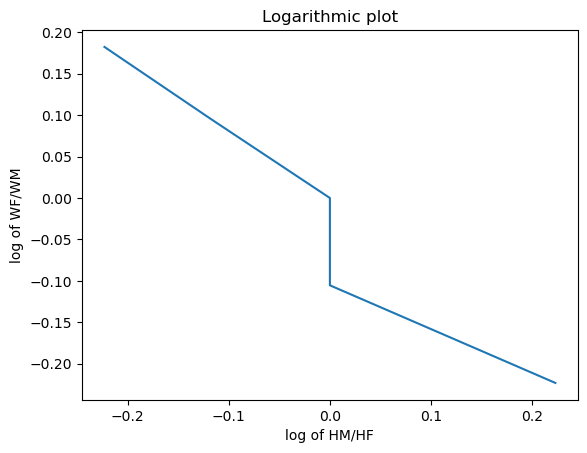

In [38]:

#reset alpha and sigma to default value

model.par.alpha = 0.5
model.par.sigma = 1

#create list with new values of WF
wF_values = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

#create empty lists for storing results
log_HF_HM = np.zeros(5)
log_WF_WM = np.zeros(5)

#loop trough all the values of wF 

for i, wFl in enumerate(wF_values):
    model.par.wF = wFl
    opt = model.solve_discrete()

    #and store the results 
    log_HF_HM[i] = np.log(opt.HF/opt.HM)
    log_WF_WM[i] = np.log(model.par.wF/model.par.wM)


# plot the results
plt.plot(log_HF_HM,log_WF_WM)

# Set plot labels and title
plt.xlabel('log of HM/HF')
plt.ylabel('log of WF/WM')
plt.title('Logarithmic plot')

plt.show()


We can conclude that the sexe that has the higher relative wage will work less at home. 

# Question 3

The objective function is set up to miniimize (-opt) the utility.

The method then iterates over a vector of wage ratios (par.wF_vec) and for each ratio, it finds the optimal values of x that maximize the utility. The optimize.minimize function takes the obj function, an initial guess for the values of x (x0=[12.0]*4), and bounds on the values of x ([(0,24)]*4) and returns the optimal values of x.

The method then saves the optimal values of x for each wage ratio in the sol object, which is a dictionary containing vectors for each variable (HM_vec, HF_vec, LM_vec, LF_vec).

In [39]:
model = inauguralproject.inauguralproject()
model.solve()

In [40]:
model.sol

namespace(LM_vec=array([5.88616755, 5.16527689, 4.45446924, 3.75671367, 3.08911355]),
          HM_vec=array([4.09483293, 4.27284333, 4.45446996, 4.64043145, 4.83201102]),
          LF_vec=array([2.86847893, 3.74726817, 4.45446924, 5.02336137, 5.4802131 ]),
          HF_vec=array([5.11847052, 4.7475245 , 4.45446996, 4.22142321, 4.02767135]),
          beta0=nan,
          beta1=nan)

In [41]:
model.run_regression()

In [42]:
model.sol

namespace(LM_vec=array([5.88616755, 5.16527689, 4.45446924, 3.75671367, 3.08911355]),
          HM_vec=array([4.09483293, 4.27284333, 4.45446996, 4.64043145, 4.83201102]),
          LF_vec=array([2.86847893, 3.74726817, 4.45446924, 5.02336137, 5.4802131 ]),
          HF_vec=array([5.11847052, 4.7475245 , 4.45446996, 4.22142321, 4.02767135]),
          beta0=0.00019059168750366667,
          beta1=-0.9987991373697614)

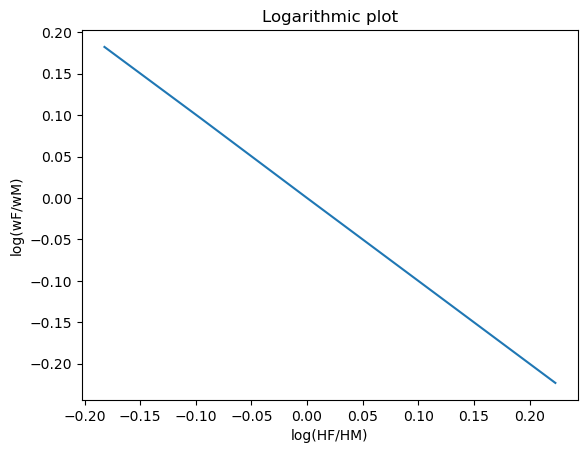

In [43]:
# calculate HF/HM and wF/wM
HFHM = model.sol.HF_vec / model.sol.HM_vec
wFwM = model.par.wF_vec / model.par.wM

# take logarithm of both
log_HFHM = np.log(HFHM)
log_wFwM = np.log(wFwM)

# plot
plt.plot(log_HFHM, log_wFwM)
plt.xlabel('log(HF/HM)')
plt.ylabel('log(wF/wM)')
plt.title('Logarithmic plot')
plt.show()

Form Logarithmic plot, We can conclude that in continous set the one who has the higher relative wage will work less at home. 

Question 4 

In [44]:
model = inauguralproject.inauguralproject()
print(model.par.wF_vec)

a_vec = np.linspace(0,1,10)
s_vec = np.linspace(0,1,10)


estimates = model.estimate(a_vec,s_vec)
a , s , var = estimates
print ("Alpha of "+ str(a)+" and sigma of "+ str(s)+ " minimizes the total variance to "+ str(var))

[0.8 0.9 1.  1.1 1.2]
par.alpha = 0.0
par.sigma = 0.0


TypeError: 'numpy.float64' object cannot be interpreted as an integer

Question 5

Based on the result of Q4, we would includes an additional parameter for the regression to extend the model and match the date when alpha equals to 0.5.

In [ ]:
#choose alpha such that M and W are equally productive
model.par.alpha = 0.5

ADD CONCISE CONLUSION.